In [57]:
# Import libraries
import moments, moments.LD
import pandas as pd, numpy as np
from collections import defaultdict
import demes, demesdraw, matplotlib.pylab as plt
import msprime as ms

import model, slice, get_LD, plot_LD

In [58]:
def plot_comparison(LDpop1,LDpop2,labels=["Original","Size Change"]):
    rhos = np.logspace(-2, 2, 21)
    
    # plot D2
    f = plt.figure(figsize=(10,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    ax.plot(rhos,LDpop1[:,0],label=labels[0])
    ax.plot(rhos,LDpop2[:,0],'k--',label=labels[1],linewidth = 1)
    ax.legend()
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel(r"$\sigma_d^2$")
    ax.set_xlabel(r"$\rho$")

    # plot DZ
    ax2.plot(rhos,LDpop1[:,1],label=labels[0])
    ax2.plot(rhos,LDpop2[:,1],'k--',label=labels[1],linewidth = 1)
    ax2.legend()
    ax2.set_yscale("log")
    ax2.set_xscale("log")
    ax2.set_ylabel(r"$\sigma_{Dz}$")
    ax2.set_xlabel(r"$\rho$")

    plt.tight_layout()
    plt.show()

### Proportional contribution to Merger

[Split(parent='Ancestral', children=['Split_01', 'Split_00'], time=3448.0)]


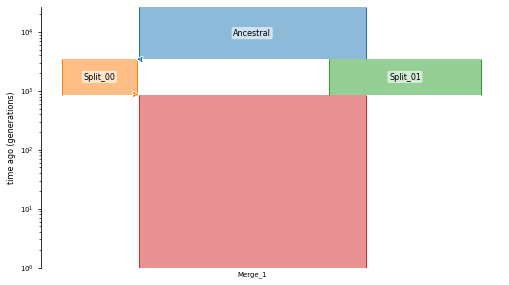

In [59]:
## bubble inspired from Mende
alpha1=[0.33,0.67]
alpha2=alpha1.copy()
N=11.5e3

generation_time=29
time_period_merge_yrs =[1e6,25e3]
time_period_merge_gen = np.round(np.array(time_period_merge_yrs)/generation_time)
time_period_splits_yrs=[75e3]
time_period_splits_gen=np.round(np.array(time_period_splits_yrs)/generation_time)

bubble = model.cake_model(Ns=[N,N],splits=[2],alpha1=[alpha1],alpha2=[alpha2],time_period_merge=time_period_merge_gen,time_period_splits=time_period_splits_gen,migration_rate=0,time_units="generations",generation_time=1,plot=True)


In [60]:
T,time_dic = slice.sample_timepoints(bubble,anc_end_time=1e6/29)
# Compute LD 
bubble_sliced = slice.slice_timepoints(bubble,time_points=[861.0,863.0,3448.0])

In [61]:
experiment_LD = get_LD.get_LD_from_sliced_demes(bubble_sliced)

In [62]:
times_dic = {'Ancestral': [3448],'Split_00': [863],'Split_01': [863],'Merge_1': [861]}

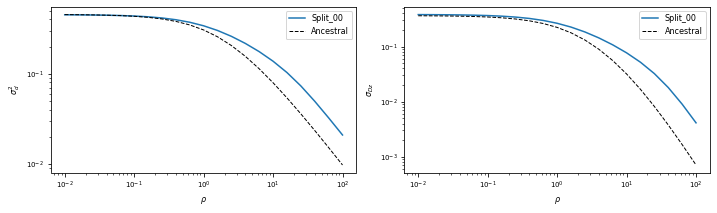

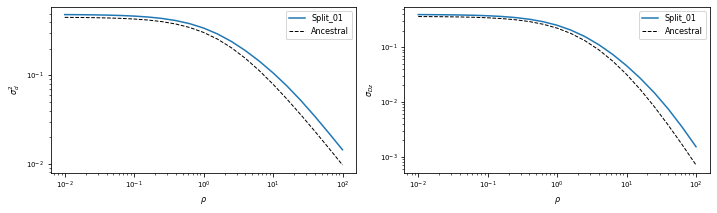

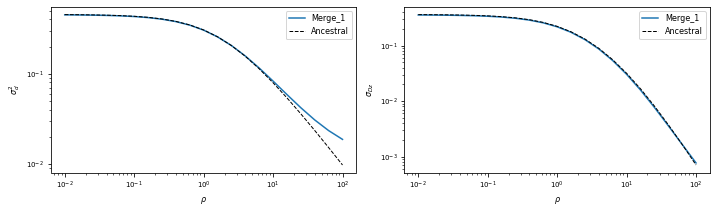

In [63]:
plot_comparison(experiment_LD['Split_00'][-1],experiment_LD['Ancestral'][-1],labels=["Split_00","Ancestral"])
plot_comparison(experiment_LD['Split_01'][-1],experiment_LD['Ancestral'][-1],labels=["Split_01","Ancestral"])
plot_comparison(experiment_LD['Merge_1'][-1],experiment_LD['Ancestral'][-1],labels=["Merge_1","Ancestral"])

### Un-proportional contribution to Merger

[Split(parent='Ancestral', children=['Split_01', 'Split_00'], time=3448.0)]


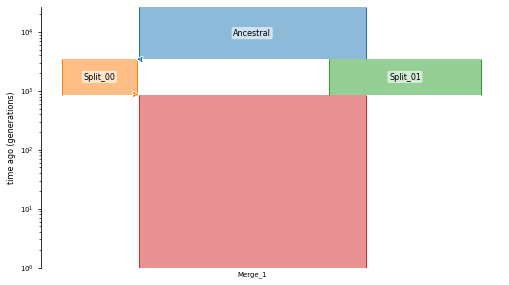

In [64]:
## bubble inspired from Mende
alpha1=[0.33,0.67]
alpha2=[0.819,0.181]

bubble_unsymm = model.cake_model(Ns=[N,N],splits=[2],alpha1=[alpha1],alpha2=[alpha2],time_period_merge=time_period_merge_gen,time_period_splits=time_period_splits_gen,migration_rate=0,time_units="generations",generation_time=1,plot=True)


In [65]:
T,time_dic = slice.sample_timepoints(bubble_unsymm,anc_end_time=1e6/29)
# Compute LD 
bubble_sliced_unsymm = slice.slice_timepoints(bubble_unsymm,time_points=[861.0,863.0,3448.0])

In [66]:
experiment_LD_unsymm = get_LD.get_LD_from_sliced_demes(bubble_sliced_unsymm)

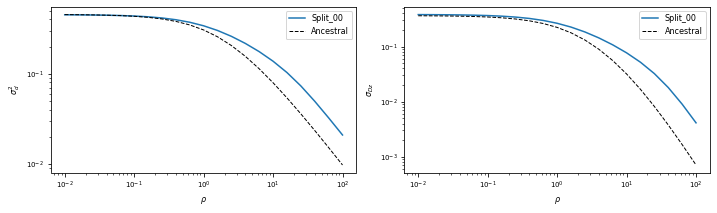

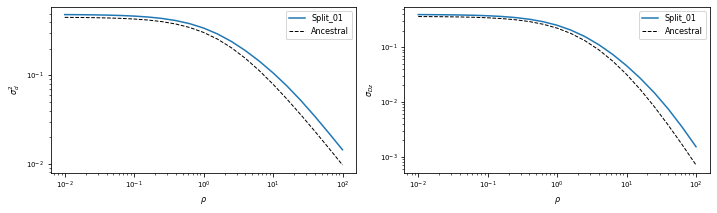

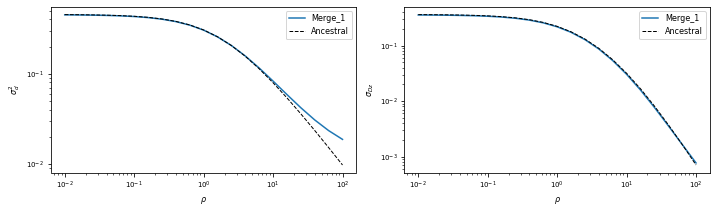

In [67]:
plot_comparison(experiment_LD['Split_00'][-1],experiment_LD_unsymm['Ancestral'][-1],labels=["Split_00","Ancestral"])
plot_comparison(experiment_LD['Split_01'][-1],experiment_LD_unsymm['Ancestral'][-1],labels=["Split_01","Ancestral"])
plot_comparison(experiment_LD['Merge_1'][-1],experiment_LD_unsymm['Ancestral'][-1],labels=["Merge_1","Ancestral"])